# Preprocessing

#### Set up environment


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import joblib
import statistics
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace. sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from tqdm import tqdm_notebook
from itertools import product
import os
%matplotlib inline

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
prj_path = '/content/drive/My Drive/PTDLKD_IS403/'
data_path = prj_path + "dataset/"

In [2]:
df = pd.read_csv('eth.csv')

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2251.000000,2251.000000,2251.000000,2251.000000,2251.000000,2.251000e+03
mean,1288.871691,1325.217261,1249.135298,1289.824163,1289.824163,1.231040e+10
std,1130.755934,1163.211903,1094.879447,1131.127287,1131.127287,1.007242e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,9.484880e+08
25%,231.194458,236.223854,226.717903,231.044563,231.044563,5.216390e+09
50%,1171.443115,1213.128906,1111.780029,1182.359985,1182.359985,9.724497e+09
75%,1901.965698,1943.987915,1868.253174,1904.440002,1904.440002,1.675596e+10
max,4810.071289,4891.704590,4718.039062,4812.087402,4812.087402,8.448291e+10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2251 non-null   object 
 1   Open       2251 non-null   float64
 2   High       2251 non-null   float64
 3   Low        2251 non-null   float64
 4   Close      2251 non-null   float64
 5   Adj Close  2251 non-null   float64
 6   Volume     2251 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 123.2+ KB


In [3]:
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
# round: lay sau dau , 1 don vi
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
top_missing_values = missing_data.head(5)
# In kết quả
print("🍄🍄🍄" , top_missing_values)
print("-------------------------------------------")

🍄🍄🍄        Total    %
Date       0  0.0
Open       0  0.0
High       0  0.0
Low        0  0.0
Close      0  0.0
-------------------------------------------


**There are no any missing data --> There is no need to handling missing data**

### Processing outliers

#### Box plot

<Axes: ylabel='Close'>

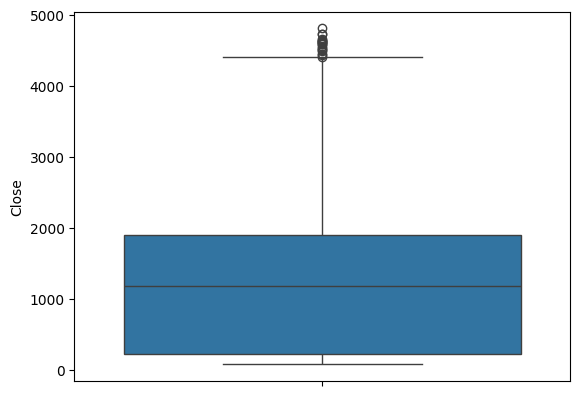

In [8]:
sns.boxplot(df.Close)

<Axes: ylabel='High'>

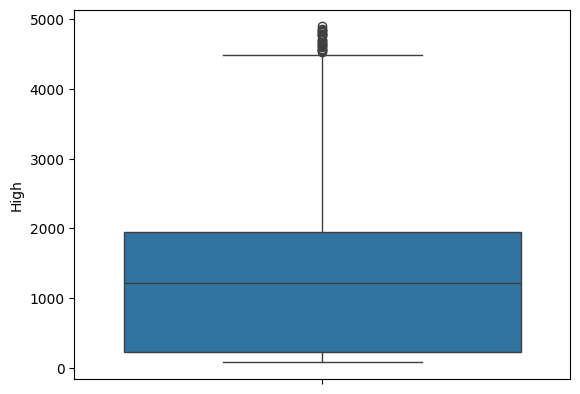

In [9]:
sns.boxplot(df.High)

<Axes: ylabel='Low'>

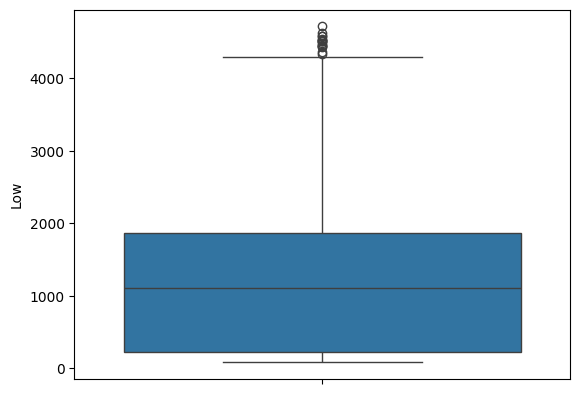

In [10]:
sns.boxplot(df.Low)

#### Using Z_score

In [4]:
def remove_outliers(df, column_name):
    Q1 = np.percentile(df[column_name], 25, method='midpoint')
    Q3 = np.percentile(df[column_name], 75, method='midpoint')
    IQR = Q3 - Q1

    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    # upper
    upper_array = np.array(df[column_name] >= upper)
    print("🎃🎃🎃🎃 Upper Bound:", upper)
    print("🍓🍋 Upper number", upper_array.sum())
    # lower
    lower_array = np.array(df[column_name] <= lower)
    print("🙏🙏🙏🙏 Lower Bound:", lower)
    print("🍐🍈 Lower number", lower_array.sum())

    upper_indices = np.where(df[column_name] >= upper)[0]
    lower_indices = np.where(df[column_name] <= lower)[0]

    # Chỉ lấy các chỉ mục tồn tại trong DataFrame
    upper_indices = np.intersect1d(upper_indices, df.index)
    lower_indices = np.intersect1d(lower_indices, df.index)

    df.drop(index = upper_indices, inplace=True)
    df.drop(index = lower_indices, inplace=True)

In [5]:
remove_outliers(df, 'Close')

🎃🎃🎃🎃 Upper Bound: 4414.53316116333
🍓🍋 Upper number 20
🙏🙏🙏🙏 Lower Bound: -2279.048595428467
🍐🍈 Lower number 0


In [6]:
remove_outliers(df, 'High')

🎃🎃🎃🎃 Upper Bound: 4471.887042999268
🍓🍋 Upper number 5
🙏🙏🙏🙏 Lower Bound: -2307.8646354675293
🍐🍈 Lower number 0


In [7]:
remove_outliers(df, 'Open')

🎃🎃🎃🎃 Upper Bound: 4380.201225280762
🍓🍋 Upper number 6
🙏🙏🙏🙏 Lower Bound: -2260.5847244262695
🍐🍈 Lower number 0


In [8]:
remove_outliers(df, 'Adj Close')

🎃🎃🎃🎃 Upper Bound: 4380.68811416626
🍓🍋 Upper number 1
🙏🙏🙏🙏 Lower Bound: -2260.8576316833496
🍐🍈 Lower number 0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2227 entries, 0 to 2250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2227 non-null   object 
 1   Open       2227 non-null   float64
 2   High       2227 non-null   float64
 3   Low        2227 non-null   float64
 4   Close      2227 non-null   float64
 5   Adj Close  2227 non-null   float64
 6   Volume     2227 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 139.2+ KB


<Axes: ylabel='Close'>

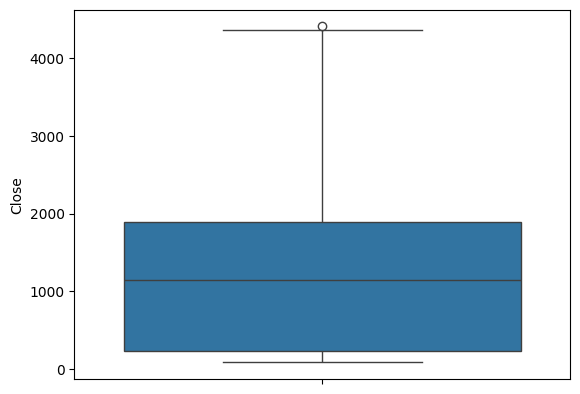

In [17]:
sns.boxplot(df.Close)

<Axes: ylabel='High'>

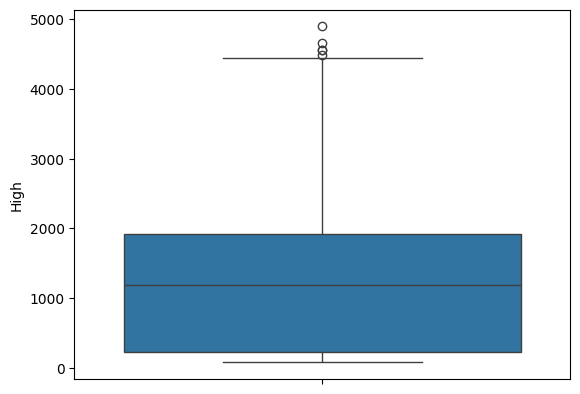

In [18]:
sns.boxplot(df.High)

** 🍷🍷🍷🍷 There are no any outlier values**

### Stationary

In [19]:
df_selected = df[['Open', 'High', 'Low', 'Close', 'Adj Close']]

In [20]:
def adf_test(timeseries):
  timeseries.replace([np.inf, -np.inf], np.nan, inplace=True)
  timeseries.dropna(inplace=True)
  result = adfuller(timeseries, autolag='AIC')

  print('ADF Statistic:', result[0])
  print('p-value:', result[1])
  print('Critical Values:', result[4])

  # Check the p-value
  if result[1] <= 0.05:
    print("Reject the null hypothesis. Data is stationary.")
  else:
    print("Fail to reject the null hypothesis. Data is non-stationary.")

# Test the stationarity of the data
for column in df_selected.columns:
    print(f"\nADF Test for column: {column}")
    adf_test(df[column])


ADF Test for column: Open
ADF Statistic: -0.9008023453170341
p-value: 0.7877080790036302
Critical Values: {'1%': -3.433317781310122, '5%': -2.8628510732269983, '10%': -2.56746794802603}
Fail to reject the null hypothesis. Data is non-stationary.

ADF Test for column: High
ADF Statistic: -1.0384584378987405
p-value: 0.7389804023449064
Critical Values: {'1%': -3.433327239607306, '5%': -2.8628552495229194, '10%': -2.5674701716229276}
Fail to reject the null hypothesis. Data is non-stationary.

ADF Test for column: Low
ADF Statistic: -0.7905854530397723
p-value: 0.821871889117299
Critical Values: {'1%': -3.4333204775429715, '5%': -2.8628522637456255, '10%': -2.5674685818969634}
Fail to reject the null hypothesis. Data is non-stationary.

ADF Test for column: Close
ADF Statistic: -0.940498794662849
p-value: 0.7743432889730413
Critical Values: {'1%': -3.4333231786793434, '5%': -2.8628534564283212, '10%': -2.5674692169202964}
Fail to reject the null hypothesis. Data is non-stationary.

ADF T

#### Lấy sai phân bậc 1

In [21]:
df_first_diff = df_selected.diff().dropna()

# Kiểm tra tính dừng cho từng cột sau khi lấy sai phân
for column in df_first_diff.columns:
    print(f"\nADF Test for column: {column}")
    adf_test(df_first_diff[column])


ADF Test for column: Open
ADF Statistic: -8.028582943656755
p-value: 1.986408914256462e-12
Critical Values: {'1%': -3.4333285957162567, '5%': -2.8628558483095645, '10%': -2.5674704904367522}
Reject the null hypothesis. Data is stationary.

ADF Test for column: High
ADF Statistic: -7.589395728808053
p-value: 2.5551962683070528e-11
Critical Values: {'1%': -3.4333285957162567, '5%': -2.8628558483095645, '10%': -2.5674704904367522}
Reject the null hypothesis. Data is stationary.

ADF Test for column: Low
ADF Statistic: -10.907712138854063
p-value: 1.1171470705423518e-19
Critical Values: {'1%': -3.4333204775429715, '5%': -2.8628522637456255, '10%': -2.5674685818969634}
Reject the null hypothesis. Data is stationary.

ADF Test for column: Close
ADF Statistic: -8.057435278300737
p-value: 1.6777869135642934e-12
Critical Values: {'1%': -3.4333285957162567, '5%': -2.8628558483095645, '10%': -2.5674704904367522}
Reject the null hypothesis. Data is stationary.

ADF Test for column: Adj Close
ADF 

In [22]:
df_first_diff

,Open,High,Low,Close,Adj Close
1,16.588989,132.299988,30.341980,111.802979,111.802979
2,113.653992,59.640991,96.104980,78.276001,78.276001
3,75.713013,70.608948,77.635010,18.202026,18.202026
4,14.036987,30.310059,10.239014,16.797974,16.797974
5,19.403992,-14.680054,38.296997,43.960083,43.960083
...,...,...,...,...,...
2246,70.403809,114.233887,76.692383,120.311279,120.311279
2247,120.162354,79.946045,53.561523,66.296387,66.296387
2248,65.875977,90.583008,129.875977,65.525635,65.525635
2249,65.488281,197.492920,33.745361,141.184570,141.184570


In [23]:
data = df_first_diff.dropna()

In [13]:
data.to_excel(os.path.join(prj_path, 'processed_data/processed_data.xlsx'), index=False)